# ML Model to predict the AWS Product

### Import the necessary libraries

In [1]:
import pandas as pd
import csv

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
pd.set_option('display.max_colwidth', 150)

### (A) Read the CSV file

In [3]:
df = pd.read_csv('C:\\Users\\Aruna\\Documents\\ACMS-IID\\input\\Clean.csv')
df['description'] = df['description'].apply(lambda x: " ".join(x for x in str(x).split()))
df.head(10)

,id,label,description
0,1737.0,Amazon SNS,sms failure delivery retrieval detailed sms log using service sms notification event failed sms get acknowledgment containing detailed log object ...
1,1736.0,Amazon SNS,messages coming multiple accounts single sms short code use simple notification service send transactional sms messages clients requested notifica...
2,1735.0,Amazon SNS,android fcm support unity plugin unity plugin build android due use depricated gcm api awsunitygcmwrapper going update plugin builds fcm anyone go...
3,1734.0,Amazon SNS,otp message delivery issue facing issue otp message delivery production environment mix behavior message getting delivered message delivered user ...
4,1733.0,Amazon SNS,simulating message persistence using sqs evaluating messaging requirements integrate multiple applications single producer publishes messages mult...
5,1732.0,Amazon SNS,sms messages delivered trying send sms messages via quite messages sent number delivered enabled cloudwatch logging shows correct entries provider...
6,1731.0,Amazon SNS,sms delivery fails phone currently unreachable unavailable started observing behaviour today used work last week sms deliveries including messages...
7,1730.0,Amazon SNS,budget alert message sample implementing receive message budget alert created billing panel find place web sample message looks like chance one me...
8,1730.0,Amazon SNS,page configure test event option select event teplate look topic notification create entire test message json format looks like records eventsourc...
9,1729.0,Amazon SNS,mobile push endpoints use default content instead apns recently diving mobile push api registered many ios clients correct topics node.js server s...


#### Check the spread of tags in the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267845 entries, 0 to 267844
Data columns (total 3 columns):
id             267843 non-null float64
label          267845 non-null object
description    267845 non-null object
dtypes: float64(1), object(2)
memory usage: 6.1+ MB


In [5]:
df['label'].describe()

count         267845
unique             8
top       Amazon EC2
freq          100000
Name: label, dtype: object

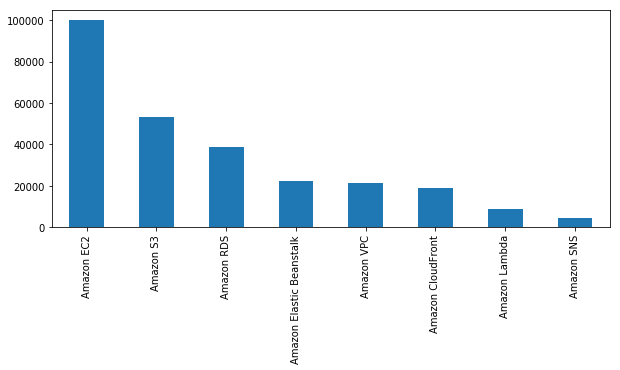

In [6]:
plt.figure(figsize=(10,4))
df.label.value_counts().plot(kind='bar');

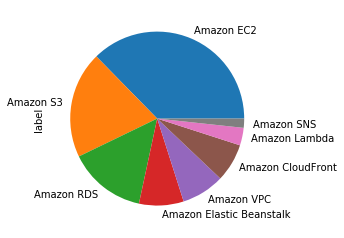

In [7]:
plt.figure(figsize=(100,4))
df.label.value_counts().plot(kind='pie');

#### Check out one sample post

In [8]:
df['description'][100]

'major gap make sure dev team aware customer pain point ideally allow connect send messages internal machines'

#### Top 30 words + frequency of each:

In [9]:
freq = pd.Series(' '.join(df['description']).split()).value_counts()[:30]
freq

instance     188147
using         67516
error         60822
server        56111
get           52442
new           50759
use           50424
file          50169
issue         47550
instances     47097
one           45103
see           43075
bucket        41488
like          40908
time          39673
access        38629
problem       38230
ms            37878
need          37660
also          36311
running       36018
help          35346
set           32010
request       31944
data          31394
files         31209
create        29111
still         28503
security      25676
account       25433
dtype: int64

In [10]:
print("There are totally", df['description'].apply(lambda x: len(x.split(' '))).sum(), "words.")

There are totally 11118429 words.


### (C) Feature Engineering & Model Deployment

In [11]:
from sklearn.model_selection import train_test_split

X = df['description']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

X_train.shape

(187491,)

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Linear SVC Model

In [13]:
from sklearn.svm import LinearSVC

svm = Pipeline([('vect', TfidfVectorizer()), ('clf', LinearSVC())])

svm.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [14]:
predictions = svm.predict(X_test)
print(classification_report(y_test, predictions))
print('accuracy:', accuracy_score(predictions, y_test))

                          precision    recall  f1-score   support

       Amazon CloudFront       0.81      0.63      0.71      5723
              Amazon EC2       0.76      0.89      0.82     30066
Amazon Elastic Beanstalk       0.82      0.67      0.74      6717
           Amazon Lambda       0.84      0.63      0.72      2671
              Amazon RDS       0.83      0.77      0.80     11594
               Amazon S3       0.79      0.82      0.81     15950
              Amazon SNS       0.86      0.67      0.75      1376
              Amazon VPC       0.79      0.63      0.70      6257

               micro avg       0.79      0.79      0.79     80354
               macro avg       0.81      0.71      0.76     80354
            weighted avg       0.79      0.79      0.79     80354

accuracy: 0.7879881524255171


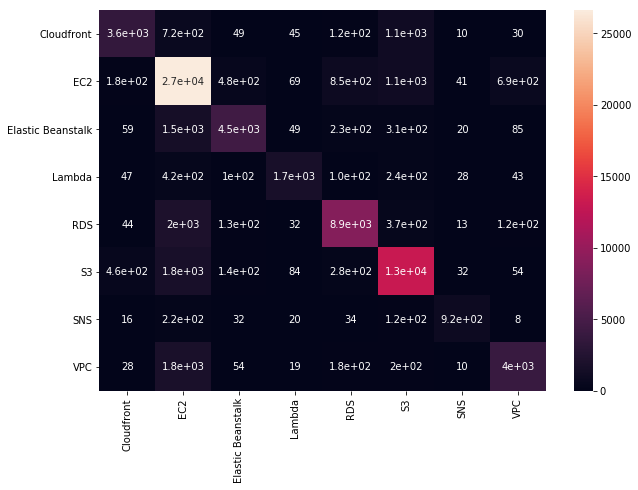

In [15]:
array = confusion_matrix(y_test, predictions);
names = ["Cloudfront", "EC2", "Elastic Beanstalk", "Lambda", "RDS", "S3", "SNS", "VPC"]

df_cm = pd.DataFrame(array, index = [i for i in names], columns = [i for i in names])

plt.figure(figsize = (10,7))
sb.heatmap(df_cm, annot=True)


In [16]:
confusion_matrix(y_test, predictions)

array([[ 3612,   717,    49,    45,   120,  1140,    10,    30],
       [  178, 26613,   484,    69,   851,  1137,    41,   693],
       [   59,  1475,  4494,    49,   229,   306,    20,    85],
       [   47,   417,   100,  1691,   105,   240,    28,    43],
       [   44,  1997,   127,    32,  8892,   368,    13,   121],
       [  461,  1770,   135,    84,   281, 13133,    32,    54],
       [   16,   225,    32,    20,    34,   122,   919,     8],
       [   28,  1796,    54,    19,   182,   204,    10,  3964]],
      dtype=int64)

## Parameter tuning

In [19]:
from sklearn.model_selection import GridSearchCV

parameters = {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


clf = GridSearchCV(svm, parameters, cv=3)

clf.fit(X_train, y_train)

print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

C:\Users\Aruna\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Aruna\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Aruna\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Aruna\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Aruna\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

Best Score:  0.7801067784586994
Best Params:  {'clf__C': 1}


In [20]:
from sklearn.model_selection import GridSearchCV

parameters = {'vect__ngram_range': [(1,1), (1,2), (1,3)]}


clf = GridSearchCV(svm, parameters, cv=3)

clf.fit(X_train, y_train)

print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

Best Score:  0.7898245782464225
Best Params:  {'vect__ngram_range': (1, 2)}


In [21]:
from sklearn.model_selection import GridSearchCV

parameters = {'vect__use_idf': [True, False]}


clf = GridSearchCV(svm, parameters, cv=3)

clf.fit(X_train, y_train)

print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

Best Score:  0.7801067784586994
Best Params:  {'vect__use_idf': True}


In [22]:
from sklearn.model_selection import GridSearchCV

parameters = {'clf__max_iter':  [100, 1000, 10000]}


clf = GridSearchCV(svm, parameters, cv=3)

clf.fit(X_train, y_train)

print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

Best Score:  0.7801067784586994
Best Params:  {'clf__max_iter': 100}


In [23]:
from sklearn.model_selection import GridSearchCV

parameters = {'vect__max_features': [100, 1000, 10000]}


clf = GridSearchCV(svm, parameters, cv=3)

clf.fit(X_train, y_train)

print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

Best Score:  0.769066248513262
Best Params:  {'vect__max_features': 10000}


In [25]:
from sklearn.model_selection import GridSearchCV

parameters = {'vect__min_df': [1, 0.01, 0.05, 0.1]}


clf = GridSearchCV(svm, parameters, cv=3)

clf.fit(X_train, y_train)

print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

Best Score:  0.7801067784586994
Best Params:  {'vect__min_df': 1}


In [26]:
from sklearn.model_selection import GridSearchCV

parameters = {'vect__max_df': [1.0, 0.9, 0.8, 0.7]}


clf = GridSearchCV(svm, parameters, cv=3)

clf.fit(X_train, y_train)

print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

Best Score:  0.7801067784586994
Best Params:  {'vect__max_df': 1.0}


#### Conclusion: No additional factors need to be tuned in the SVM model apart from adding bi-gram instead of uni-gram features.

### Tuned Model

In [27]:
svm = Pipeline([('vect', TfidfVectorizer(ngram_range=(1,2))), ('clf', LinearSVC())])
svm.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [28]:
predictions = svm.predict(X_test)
print(classification_report(y_test, predictions))
print('accuracy:', accuracy_score(predictions, y_test))

                          precision    recall  f1-score   support

       Amazon CloudFront       0.82      0.64      0.72      5723
              Amazon EC2       0.78      0.89      0.83     30066
Amazon Elastic Beanstalk       0.82      0.67      0.74      6717
           Amazon Lambda       0.86      0.65      0.74      2671
              Amazon RDS       0.85      0.81      0.83     11594
               Amazon S3       0.79      0.84      0.81     15950
              Amazon SNS       0.88      0.67      0.76      1376
              Amazon VPC       0.80      0.65      0.72      6257

               micro avg       0.80      0.80      0.80     80354
               macro avg       0.82      0.73      0.77     80354
            weighted avg       0.80      0.80      0.80     80354

accuracy: 0.7989770266570426


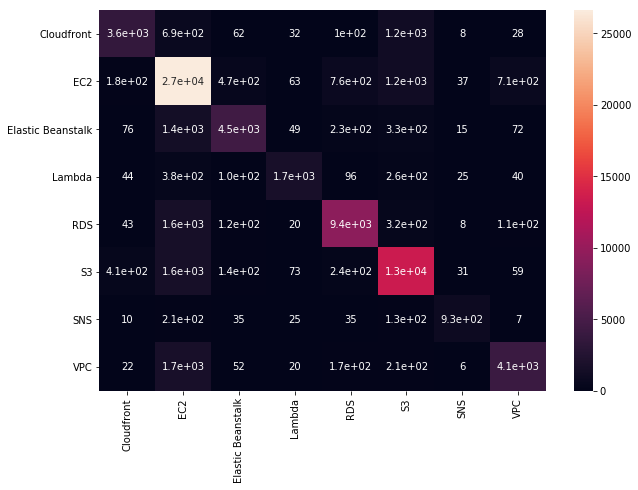

In [29]:
array = confusion_matrix(y_test, predictions);
names = ["Cloudfront", "EC2", "Elastic Beanstalk", "Lambda", "RDS", "S3", "SNS", "VPC"]

df_cm = pd.DataFrame(array, index = [i for i in names], columns = [i for i in names])

plt.figure(figsize = (10,7))
sb.heatmap(df_cm, annot=True)

In [30]:
confusion_matrix(y_test, predictions)

array([[ 3637,   692,    62,    32,   100,  1164,     8,    28],
       [  177, 26612,   474,    63,   761,  1232,    37,   710],
       [   76,  1430,  4515,    49,   226,   334,    15,    72],
       [   44,   382,   105,  1723,    96,   256,    25,    40],
       [   43,  1593,   121,    20,  9374,   321,     8,   114],
       [  410,  1642,   143,    73,   244, 13348,    31,    59],
       [   10,   212,    35,    25,    35,   126,   926,     7],
       [   22,  1714,    52,    20,   166,   211,     6,  4066]],
      dtype=int64)

In [24]:
LinearSVC?

In [ ]:
# Choose some parameter combinations to try
parameters = {
    'vect__ngram_range': [(1,1), (1,2), (1,3)],
    'vect__max_df': [1.0, 0.9, 0.8, 0.7],
    'vect__min_df': [1, 0.01, 0.05, 0.1],
    'vect__max_features': [100, 1000, None],
    'vect__use_idf': [True, False],
    'clf__c': [0.1, 1, 10, 100, 1000],
    'clf__max_iter':  [100, 1000, 10000]
}